# PORTADA

<p align="center">
<img src="https://www.uao.edu.co/wp-content/uploads/2023/01/3-Home-principal-Mockup-Escritorio-UAO-copy-05.png" width=30%>


<h1>UNIVERSIDAD AUTÓNOMA DE OCCIDENTE</strong></h1>
<h2>CALI - COLOMBIA</strong></h2>
<h2>19/05/2024</strong></h2>
<h1><strong>Especialización en Inteligencia Artificial</strong></h1>
<h2><strong>PROCESAMIENTO DE DATOS SECUENCIALES CON DEPP LEARNING</strong></h2>
<h2><strong>TRABAJO: </strong> ​PROCESAMIENTO DE SEÑALES UNIDIMENSIONALES CON MODELOS AUTO REGRESIVOS, CONVOLUCIÓN 1D, CONVOLUCIÓN 2D USANDO EL ESPECTROGRAMA Y REDES RECURRENTES​ </h2>
<h2><strong>Profesor:</strong> JESUS ALFONSO LOPEZ SOTELO</h2>
<h2><strong>Alumnos:</strong></h2>

*   <font color='red'> 2235650 Guillermo Leon Zapata Álvarez </font>
*   <font color='red'> 2237389 Yoniliman Galvis Aguirre </font>
*   <font color='red'> 2235918 Jairo Alberto Vélez Giraldo </font>

# **OBJETIVOS DE LA APLICACION**

El objetivo principal de esta aplicación es predecir las ventas futuras de un producto utilizando datos históricos de ventas. Esta predicción es crucial para la planificación y la toma de decisiones en el ámbito del retail. Al anticipar las ventas futuras, las empresas pueden optimizar sus inventarios, ajustar sus estrategias de marketing y tomar decisiones financieras más informadas.


# **DESCRIPCION DEL PROYECTO**



Para alcanzar nuestro objetivo, seguiremos los siguientes pasos:

**Dataset:** Utilizaremos un conjunto de datos que contiene información de ventas diarias de un producto desde enero de 2017 hasta noviembre de 2018. El dataset consta de 604 datos y fue descargado de:
https://raw.githubusercontent.com/jbagnato/machinelearning/master/time_series.csv

**Implementación de Modelos:**

**Preprocesamiento de Datos:** Dividiremos el dataset en conjuntos de entrenamiento (80%) y validación (20%).
**Modelos de Redes Neuronales Profundas:** Implementaremos tres tipos de modelos basados en redes neuronales profundas en TensorFlow-Keras:

* **Red Multicapa Profunda (MLP):** Utilizaremos capas densas para construir una red multicapa profunda.
*	**Redes Recurrentes (RNN):** Utilizaremos una red neuronal recurrente para modelar la dependencia secuencial en los datos de series temporales.
*	**Convolución 1D:** Implementaremos una red convolucional unidimensional para capturar patrones temporales.

**Entrenamiento de Modelos:** Entrenaremos cada modelo utilizando el conjunto
de datos de entrenamiento.

**Evaluación de Modelos:** Evaluaremos el rendimiento de cada modelo utilizando métricas adecuadas para la predicción de series temporales.



In [1]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [52]:
# Se importan las dependencias y librerías necesarias
import datetime, os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN



In [20]:
# Se cargan los datos en formato csv
RutaFile="/content/gdrive/MyDrive/Segundo_Semestre/Procesamiento_Datos_Secuenciales/Productos/Productos.csv"
dataframe = pd.read_csv(RutaFile, header=None)
Fecha = dataframe.iloc[:,0:1].values
Temp = dataframe.iloc[:,1:2].values

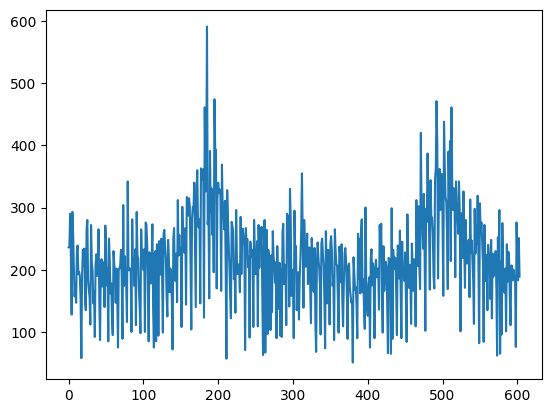

In [21]:
# Se grafican los datos de temperatura
plt.plot(Temp)

In [22]:
# Se normalizan los datos (media = 0 y desv esta = 1)
scaler1 = StandardScaler()
scaler1.fit(Temp)
TempN=scaler1.transform(Temp)

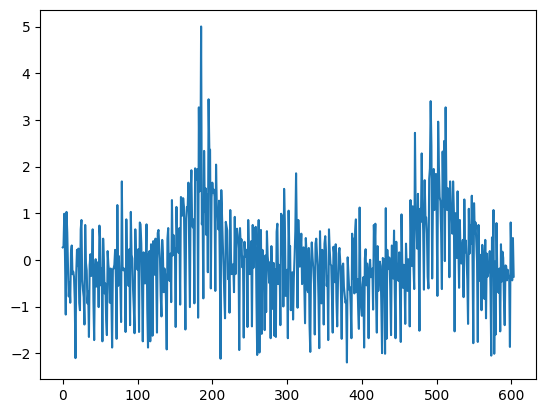

In [23]:
# Se grafican los datos normalizados
plt.plot(TempN)

# **Preparación de los datos**

In [24]:
dataset_split = 0.8
windows_split = 10
print('La cantidad total de muestras es:', len(TempN))
print('Se divide el dataset en 80% - 20%' )
print('Cantidad de datos de Traning:', int(len(TempN)*dataset_split))
print('Cantidad de datos de Test:', len(TempN) - int(len(TempN)*dataset_split))

La cantidad total de muestras es: 604
Se divide el dataset en 80% - 20%
Cantidad de datos de Traning: 483
Cantidad de datos de Test: 121


In [25]:
  #Se divide el dataset en 80% de los datos para training

TempTrain=TempN[0:int(len(TempN)*dataset_split)]
Dataset = keras.utils.timeseries_dataset_from_array(data=TempTrain[:-windows_split],
                                                    targets=TempTrain[windows_split:],
                                                    sequence_length=windows_split,
                                                    sequence_stride=1,
                                                    sampling_rate=1,
                                                    batch_size=1)

In [26]:
print('La cantidad total de ventanas de training es:', len(Dataset))

La cantidad total de ventanas de training es: 464


In [27]:
CantidadWindows=len(Dataset)
LongitudWindow=windows_split

DatosVentanasInput=np.zeros((CantidadWindows,LongitudWindow,1))
DatosVentanasOutput=np.zeros((CantidadWindows,1))

Cont=0
for inputs in Dataset:
      DatoAux=np.array(inputs[0][:])
      DatoAux2=DatoAux.reshape(1,windows_split)
      DatosVentanasInput[Cont,:]=DatoAux2.T
      Cont=Cont+1

Cont=0
for targets in Dataset:
      DatoAux3=np.array(targets[1][:])
      DatosVentanasOutput[Cont]=DatoAux3
      Cont=Cont+1

In [28]:
# Se crea las variables para la entrada y la salida de entrenamiento del modelo autoregresivo
# Esto depende del tamaño de la ventana de datos que se use como entrada al modelo
Xtrain=np.zeros((CantidadWindows,LongitudWindow))
Ytrain=np.zeros((CantidadWindows,1))
for i in range(CantidadWindows):
    Xtrain[i,:]=DatosVentanasInput[i,:,:].reshape(1,windows_split)
    Ytrain[i]=DatosVentanasOutput[i]

print('El dataset de Xtrain contiene {0} ventanas de {1} datos'. format(str(Xtrain.shape[0]), str(Xtrain.shape[1])))
print('El dataset de Ytrain contiene {0} datos de un valor {1} cada uno'. format(str(Ytrain.shape[0]), str(Ytrain.shape[1])))

El dataset de Xtrain contiene 464 ventanas de 10 datos
El dataset de Ytrain contiene 464 datos de un valor 1 cada uno


In [29]:
   #Se forma el dataset de test con el 20% restante del total de dataset
TempTest=TempN[int(len(TempN)*dataset_split):-1]
DatasetTest = keras.utils.timeseries_dataset_from_array(data=TempTest[:-windows_split],
                                                        targets=TempTest[windows_split:],
                                                        sequence_length=windows_split,
                                                        sequence_stride=1,
                                                        sampling_rate=1,
                                                        batch_size=1)

In [30]:
print('La cantidad total de ventanas de test es:', len(DatasetTest))

La cantidad total de ventanas de test es: 101


In [31]:
CantidadWindowsTest=len(DatasetTest)
LongitudWindow=windows_split

DatosVentanasInputTest=np.zeros((CantidadWindowsTest,LongitudWindow,1))
DatosVentanasOutputTest=np.zeros((CantidadWindowsTest,1))

Cont=0
for inputs in DatasetTest:
      DatoAux=np.array(inputs[0][:])
      DatoAux2=DatoAux.reshape(1,windows_split)
      DatosVentanasInputTest[Cont,:]=DatoAux2.T
      Cont=Cont+1

Cont=0
for targets in DatasetTest:
      DatoAux3=np.array(targets[1][:])
      DatosVentanasOutputTest[Cont]=DatoAux3
      Cont=Cont+1

In [32]:
# Se crea las variables para la entrada y la salida de testeo del modelo autoregresivo
# Esto depende del tamaño de la ventana de datos que se use como entrada al modelo
Xtest=np.zeros((CantidadWindowsTest,LongitudWindow))
Ytest=np.zeros((CantidadWindowsTest,1))
for i in range(CantidadWindowsTest):
    Xtest[i,:]=DatosVentanasInputTest[i,:,:].reshape(1,windows_split)
    Ytest[i]=DatosVentanasOutputTest[i]

print('El dataset de Xtest contiene {0} ventanas de {1} datos'. format(str(Xtest.shape[0]), str(Xtest.shape[1])))
print('El dataset de Ytest contiene {0} datos de un valor {1} cada uno'. format(str(Ytest.shape[0]), str(Ytest.shape[1])))

El dataset de Xtest contiene 101 ventanas de 10 datos
El dataset de Ytest contiene 101 datos de un valor 1 cada uno


# **Modelo MLP**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1101 (4.30 KB)
Trainable params: 1101 (4.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


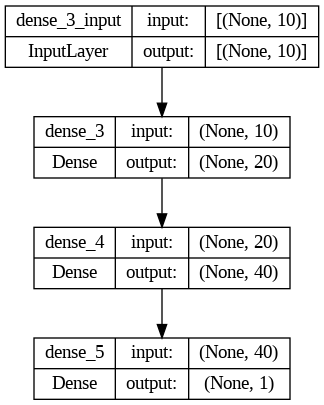

In [33]:
# Se crea el modelo secuencial en Keras con capas densas
modelo_mlp = keras.models.Sequential()
modelo_mlp.add(keras.layers.Dense(20,input_shape=(10,),activation='relu'))
modelo_mlp.add(keras.layers.Dense(40,activation='relu'))
modelo_mlp.add(keras.layers.Dense(1,activation='linear'))
# Se muestra el resumen de la arquitectura del modelo
modelo_mlp.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo_mlp, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **Arquitectura del Modelo MLP**

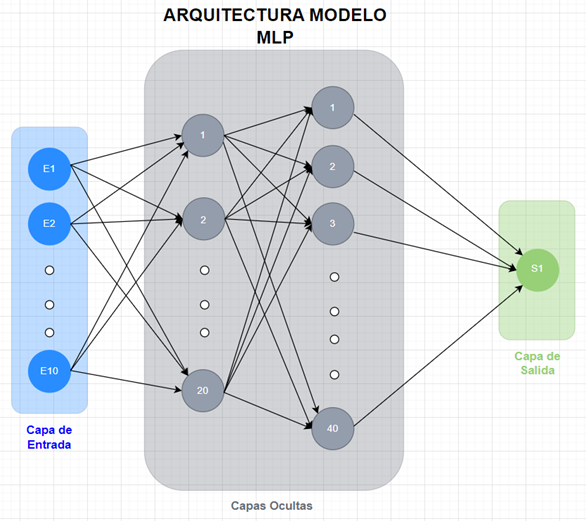

## **Calculo de Parametros:**

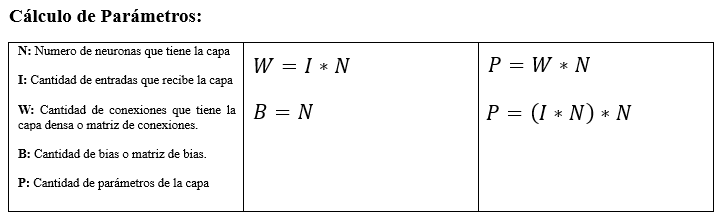

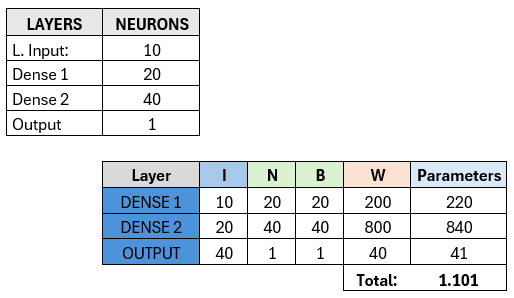

## **En este modelo:**

**1.	Capa de Entrada:**
* Tiene 10 neuronas (correspondientes a las 10 características de entrada).

**2.	Primera Capa Oculta:**
*	Densa con 20 neuronas:
** Función de activación **ReLU** (Rectified Linear Unit).

**3.	Segunda Capa Oculta:**
* Densa con 40 neuronas:
** También utiliza la función de activación **ReLU**.

**4.	Capa de Salida:**
* Densa con 1 neurona:
** Función de activación **lineal**.
** Adecuada para problemas de **regresión**, donde se predice un valor continuo (como la temperatura).

Este modelo MLP procesa 10 entradas y produce una predicción continua en la capa de salida.


In [34]:
# Se compila el modelo
modelo_mlp.compile(optimizer=Adam(learning_rate=0.0001),loss='mse', metrics=['mse'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Se entrena el modelo
historia_mlp=modelo_mlp.fit(Xtrain,Ytrain,
                            validation_data=(Xtest,Ytest),
                            callbacks=[callback],
                            epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 1s 21ms/step - loss: 0.9567 - mse: 0.9567 - val_loss: 1.2889 - val_mse: 1.2889
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 0.9321 - mse: 0.9321 - val_loss: 1.2466 - val_mse: 1.2466
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 0.9121 - mse: 0.9121 - val_loss: 1.2068 - val_mse: 1.2068
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 0.8964 - mse: 0.8964 - val_loss: 1.1671 - val_mse: 1.1671
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 0.8786 - mse: 0.8786 - val_loss: 1.1400 - val_mse: 1.1400
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 0.8659 - mse: 0.8659 - val_loss: 1.1132 - val_mse: 1.1132
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 0.8539 - mse: 0.8539 - val_loss: 1.0897 - val_mse: 1.0897
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8423 - 

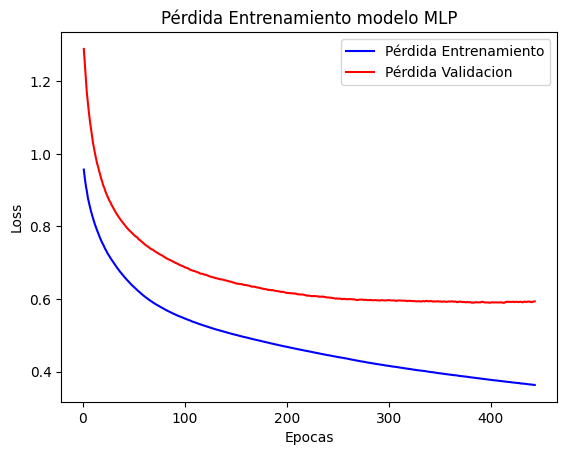

In [35]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia_mlp.history['loss']
perdida_test = historia_mlp.history['val_loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.plot(epocas, perdida_test, 'r', label='Pérdida Validacion')
plt.title('Pérdida Entrenamiento modelo MLP')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
modelo_mlp.evaluate(Xtrain,Ytrain)

15/15 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.3629


[0.3629102110862732, 0.3629102110862732]

In [37]:
# Se realiza la predicción de un paso
Ypredic1_mlp=modelo_mlp.predict(Xtest)

4/4 [==============================] - 0s 3ms/step


In [38]:
# Se realiza la predicción de dos pasos
Ypredic2_mlp=np.zeros((Xtest.shape[0],1))
for j in range(0,Xtest.shape[0]-2,2):
    Dato1=Xtest[j,0:10]
    Dato1E=(np.expand_dims(Dato1,0))
    Ypredic2_mlp[j,0]=modelo_mlp.predict(Dato1E, verbose=0)
    Dato2=Xtest[j+1,0:10]
    Dato2E=(np.expand_dims(Dato2,0))
    Dato2E[0,9]=Ypredic2_mlp[j]
    Ypredic2_mlp[j+1,0]=modelo_mlp.predict(Dato2E, verbose=0)

<ipython-input-38-e818450db0a4>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredic2_mlp[j,0]=modelo_mlp.predict(Dato1E, verbose=0)
<ipython-input-38-e818450db0a4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Dato2E[0,9]=Ypredic2_mlp[j]
<ipython-input-38-e818450db0a4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredic2_mlp[j+1,0]=modelo_mlp.predict(Dato2E, verbose=0)


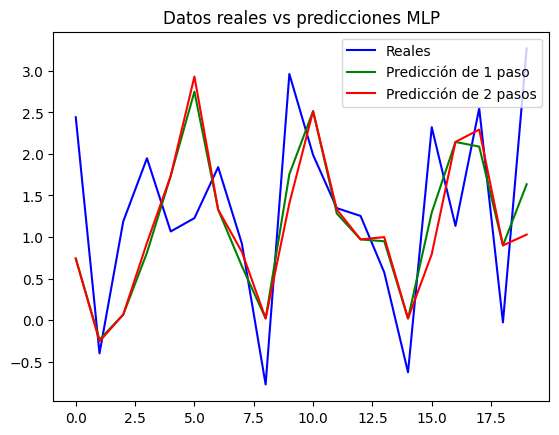

Error cuadrático medio de 1 paso del modelo MLP: 0.5936771
Error cuadrático medio de 2 pasos del modelo MLP: 0.6747308921577443


In [39]:
plt.plot(Ytest[0:20,0:10], 'b', label='Reales')
plt.plot(Ypredic1_mlp[0:20,0:10], 'g', label='Predicción de 1 paso')
plt.plot(Ypredic2_mlp[0:20,0:10], 'r', label='Predicción de 2 pasos')
plt.title('Datos reales vs predicciones MLP')
plt.legend()
plt.show()
# Se calcula el MSE logrado con las predicciones
mse1_mlp=np.mean(keras.losses.mean_squared_error(Ytest, Ypredic1_mlp))
print('Error cuadrático medio de 1 paso del modelo MLP:', mse1_mlp)
mse2_mlp=np.mean(keras.losses.mean_squared_error(Ytest, Ypredic2_mlp))
print('Error cuadrático medio de 2 pasos del modelo MLP:', mse2_mlp)

# **Modelo RNN**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 10)          120       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 761 (2.97 KB)
Trainable params: 761 (2.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


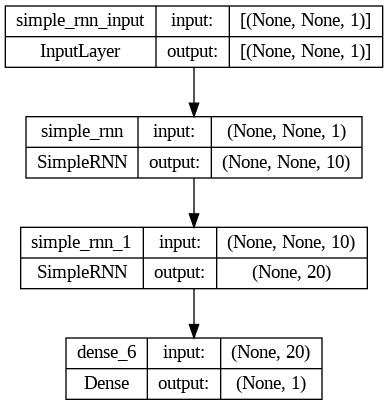

In [40]:
# Se crea el modelo secuencial en Keras con capas densas
modelo_rnn = keras.models.Sequential()
modelo_rnn.add(keras.layers.SimpleRNN(10, return_sequences=True, input_shape=[None, 1]))
modelo_rnn.add(keras.layers.SimpleRNN(20))
#modelo_rnn.add(Dropout(0.1))
modelo_rnn.add(keras.layers.Dense(1, activation='linear'))
# Se muestra el resumen de la arquitectura del modelo
modelo_rnn.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo_rnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


## **Arquitectura del Modelo RNN**

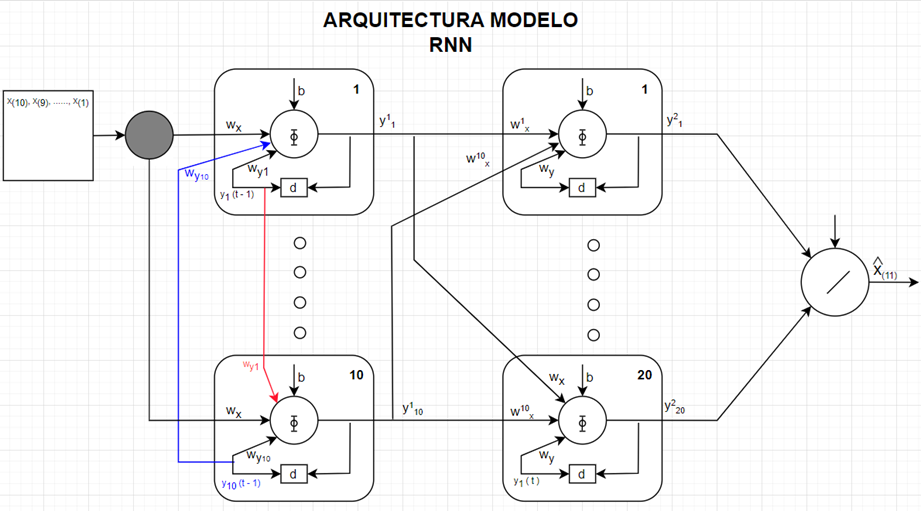

## **Calculo de Parametros:**

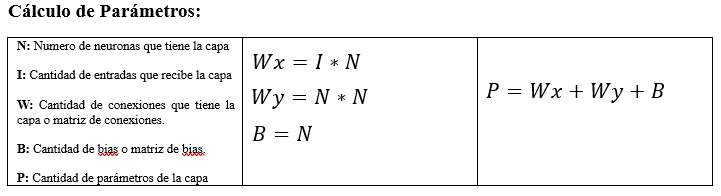

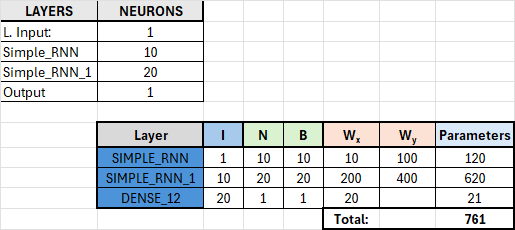

## **En este modelo:**

**1.	Capa de Entrada:**
* SimpleRNN con 10 neuronas:
** return_sequences=True: Esto significa que la capa devuelve secuencias completas en lugar de solo la última salida.
** input_shape=[None, 1]: Se espera una entrada de secuencia de longitud variable (sin límite superior) con una sola característica.

**2.	Capa Oculta:**
* SimpleRNN con 20 neuronas:
** No se especifica return_sequences, por lo que esta capa devuelve solo la última salida de la secuencia.

**3.	Capa de Salida:**
* Densa con 1 neurona:
** Función de activación lineal.
** Adecuada para problemas de regresión, donde se predice un valor continuo (como la temperatura).


In [41]:
# Se compila el modelo
modelo_rnn.compile(optimizer=Adam(learning_rate=0.0001),loss='mse', metrics=['mse'])
# Se entrena el modelo
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=50)
historia_rnn=modelo_rnn.fit(Xtrain,Ytrain,
                            validation_data=(Xtest,Ytest),
                            epochs=500,
                            callbacks=[callback],verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 51ms/step - loss: 1.2299 - mse: 1.2299 - val_loss: 1.1945 - val_mse: 1.1945
Epoch 2/500
15/15 [==============================] - 0s 15ms/step - loss: 1.1763 - mse: 1.1763 - val_loss: 1.1488 - val_mse: 1.1488
Epoch 3/500
15/15 [==============================] - 0s 14ms/step - loss: 1.1318 - mse: 1.1318 - val_loss: 1.1081 - val_mse: 1.1081
Epoch 4/500
15/15 [==============================] - 0s 14ms/step - loss: 1.0896 - mse: 1.0896 - val_loss: 1.0772 - val_mse: 1.0772
Epoch 5/500
15/15 [==============================] - 0s 14ms/step - loss: 1.0525 - mse: 1.0525 - val_loss: 1.0481 - val_mse: 1.0481
Epoch 6/500
15/15 [==============================] - 0s 14ms/step - loss: 1.0216 - mse: 1.0216 - val_loss: 1.0228 - val_mse: 1.0228
Epoch 7/500
15/15 [==============================] - 0s 13ms/step - loss: 0.9915 - mse: 0.9915 - val_loss: 1.0030 - val_mse: 1.0030
Epoch 8/500
15/15 [==============================] - 0s 14ms/step - loss: 0.

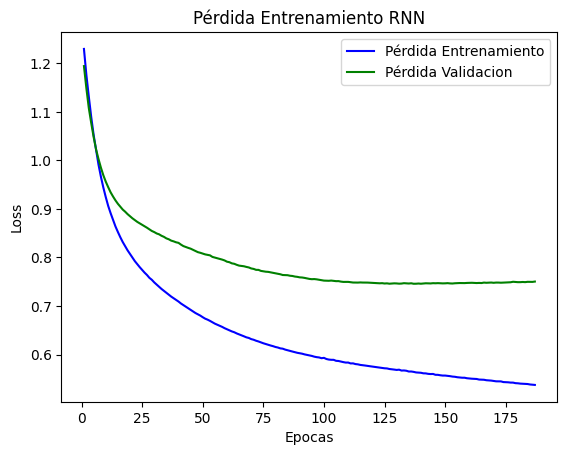

In [42]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia_rnn.history['loss']
perdida_test = historia_rnn.history['val_loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.plot(epocas, perdida_test, 'g', label='Pérdida Validacion')
plt.title('Pérdida Entrenamiento RNN')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Se realiza la predicción de un paso
Ypredic1_rnn=modelo_rnn.predict(Xtest)

4/4 [==============================] - 0s 7ms/step


In [44]:
# Se realiza la predicción de dos pasos
Ypredic2_rnn=np.zeros((Xtest.shape[0],1))
for j in range(0,Xtest.shape[0]-2,2):
    Dato1=Xtest[j,0:10]
    Dato1E=(np.expand_dims(Dato1,0))
    Ypredic2_rnn[j,0]=modelo_rnn.predict(Dato1E, verbose=0)
    Dato2=Xtest[j+1,0:10]
    Dato2E=(np.expand_dims(Dato2,0))
    Dato2E[0,9]=Ypredic2_rnn[j]
    Ypredic2_rnn[j+1,0]=modelo_rnn.predict(Dato2E, verbose=0)

<ipython-input-44-5165d068ef3a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredic2_rnn[j,0]=modelo_rnn.predict(Dato1E, verbose=0)
<ipython-input-44-5165d068ef3a>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Dato2E[0,9]=Ypredic2_rnn[j]
<ipython-input-44-5165d068ef3a>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredic2_rnn[j+1,0]=modelo_rnn.predict(Dato2E, verbose=0)


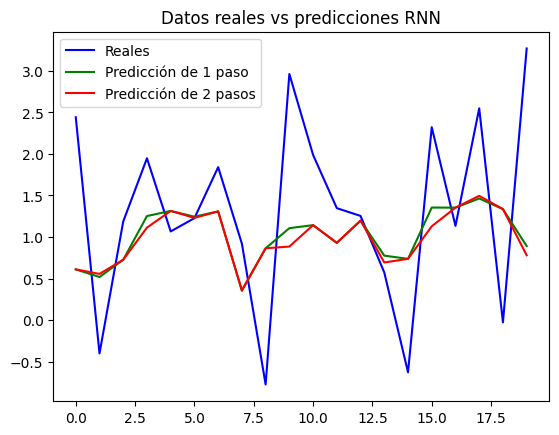

Error cuadrático medio de 1 paso del modelo RNN: 0.75036305
Error cuadrático medio de 2 pasos del modelo RNN: 0.7579475694751704


In [45]:
plt.plot(Ytest[0:20,0:10], 'b', label='Reales')
plt.plot(Ypredic1_rnn[0:20,0:10], 'g', label='Predicción de 1 paso')
plt.plot(Ypredic2_rnn[0:20,0:10], 'r', label='Predicción de 2 pasos')
plt.title('Datos reales vs predicciones RNN')
plt.legend()
plt.show()
# Se calcula el MSE logrado con las predicciones
mse1_rnn=np.mean(keras.losses.mean_squared_error(Ytest, Ypredic1_rnn))
print('Error cuadrático medio de 1 paso del modelo RNN:', mse1_rnn)
mse2_rnn=np.mean(keras.losses.mean_squared_error(Ytest, Ypredic2_rnn))
print('Error cuadrático medio de 2 pasos del modelo RNN:', mse2_rnn)

# **Modelo CONV1D**

In [46]:
#Se hace un reshape de los datasets para que puedan ser procesados por una red CONV1D
Xtrain_conv1d = Xtrain.reshape(464,10,1)
ytrain_conv1d = Ytrain.reshape(464,)
Xtest_conv1d = Xtest.reshape(101,10,1)
ytest_conv1d = Ytest.reshape(101,)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 10, 4)             16        
                                                                 
 conv1d_15 (Conv1D)          (None, 10, 8)             104       
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 5, 8)              0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 40)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 41        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_______________

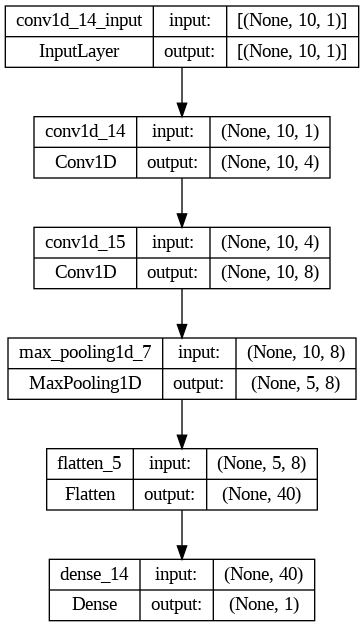

In [68]:
# Create a CNN model
model_conv1d = Sequential()
model_conv1d.add(Conv1D(filters=4,
                 kernel_size=3,
                 activation='relu',
                 padding = 'same',
                 input_shape=(10, 1)))
#model_conv1d.add(Dropout(0.2))
model_conv1d.add(Conv1D(filters=8,
                 kernel_size=3,
                 activation='relu',
                 padding = 'same'))
model_conv1d.add(MaxPooling1D(pool_size=2))
model_conv1d.add(Flatten())
#model_conv1d.add(Dense(10, activation='relu'))
model_conv1d.add(Dense(1, activation ='linear'))  # Output layer for regression


model_conv1d.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(model_conv1d, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **Arquitectura del Modelo RNN y Calculo de Parametros**

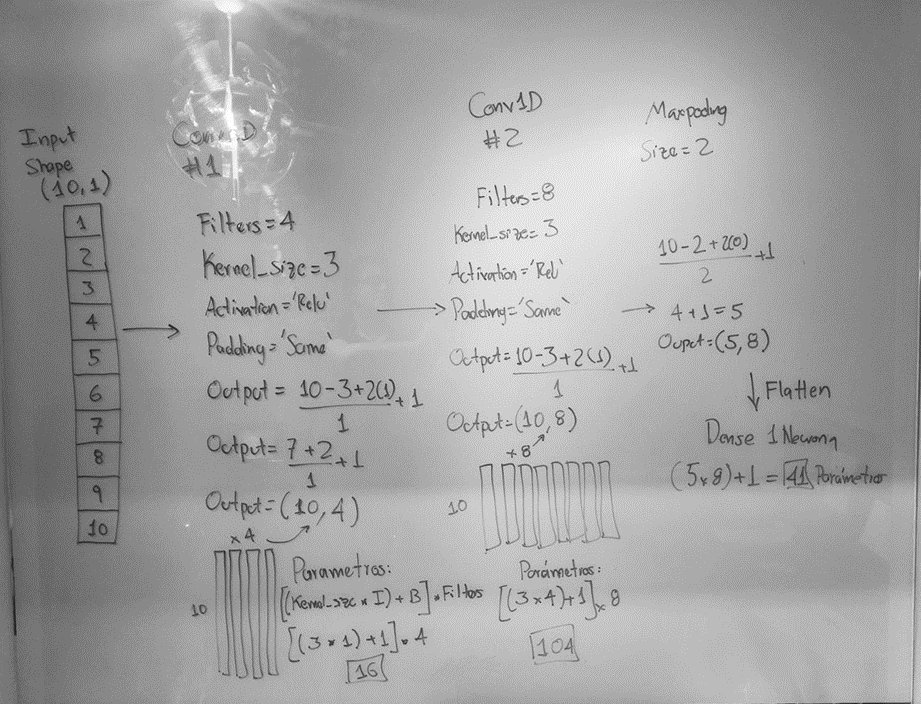

## **En este modelo:**

**1.	Capa de Entrada:**
* Conv1D con 4 filtros:
** kernel_size: Tamaño del filtro (ventana) para la convolución (3 en este caso).
** activation: Función de activación ReLU (Rectified Linear Unit).
** padding: Relleno de ceros para mantener el tamaño de la salida igual al de la entrada (valor “same”).
** input_shape: Forma de entrada (10, 1), lo que significa que se esperan secuencias de longitud 10 con una sola característica.

**2.	Capa Oculta:**
* Conv1D con 8 filtros:
** Mismo tamaño de filtro y función de activación que la capa de entrada.
** También utiliza relleno de ceros (“same”).

**3.	Capa de Submuestreo (Pooling):**
* MaxPooling1D con un tamaño de ventana de 2:
** Reduce la longitud de la secuencia a la mitad (de 10 a 5).

**4.	Capa de Aplanamiento:**
* Flatten:
** Convierte la salida de la capa de submuestreo en un vector unidimensional.

**5.	Capa de Salida:**
* Densa con 1 neurona:
** Función de activación lineal.
** Adecuada para problemas de regresión, donde se predice un valor continuo (como la temperatura).


Este modelo CNN procesa secuencias de longitud 10 con una sola característica y produce una predicción continua en la capa de salida.


In [69]:
model_conv1d.compile(optimizer=Adam(learning_rate=0.0001),loss='mse', metrics=['mse'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=50)

In [70]:
historia_conv1d = model_conv1d.fit(Xtrain_conv1d, ytrain_conv1d,
                                   epochs=800,
                                   validation_data=(Xtest_conv1d,ytest_conv1d),
                                   callbacks=[callback],verbose=1)

Epoch 1/800
15/15 [==============================] - 1s 18ms/step - loss: 1.0268 - mse: 1.0268 - val_loss: 1.3749 - val_mse: 1.3749
Epoch 2/800
15/15 [==============================] - 0s 5ms/step - loss: 1.0193 - mse: 1.0193 - val_loss: 1.3619 - val_mse: 1.3619
Epoch 3/800
15/15 [==============================] - 0s 5ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.3498 - val_mse: 1.3498
Epoch 4/800
15/15 [==============================] - 0s 6ms/step - loss: 1.0055 - mse: 1.0055 - val_loss: 1.3366 - val_mse: 1.3366
Epoch 5/800
15/15 [==============================] - 0s 5ms/step - loss: 0.9988 - mse: 0.9988 - val_loss: 1.3233 - val_mse: 1.3233
Epoch 6/800
15/15 [==============================] - 0s 5ms/step - loss: 0.9919 - mse: 0.9919 - val_loss: 1.3111 - val_mse: 1.3111
Epoch 7/800
15/15 [==============================] - 0s 6ms/step - loss: 0.9850 - mse: 0.9850 - val_loss: 1.2990 - val_mse: 1.2990
Epoch 8/800
15/15 [==============================] - 0s 6ms/step - loss: 0.9786 - 

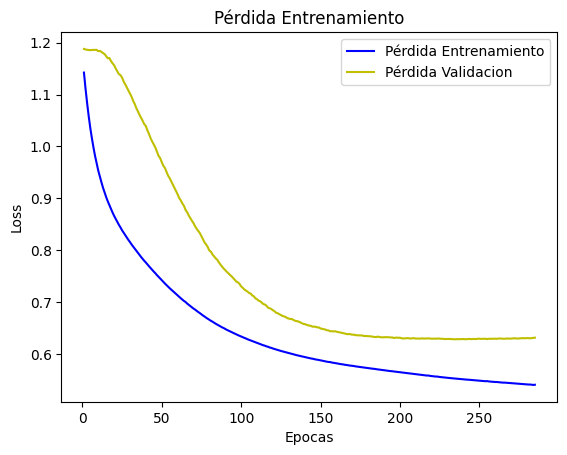

In [ ]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia_conv1d.history['loss']
perdida_test = historia_conv1d.history['val_loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.plot(epocas, perdida_test, 'y', label='Pérdida Validacion')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Se realiza la predicción de un paso
Ypredict1_conv1d=model_conv1d.predict(Xtest_conv1d)

4/4 [==============================] - 0s 15ms/step


In [ ]:
# Se realiza la predicción de dos pasos
Ypredict2_conv1d=np.zeros((Xtest.shape[0],))
for j in range(0,Xtest.shape[0]-1,2):
    Dato1=Xtest_conv1d[j,0:10,]
    Dato1E=(np.expand_dims(Dato1,0))
    Ypredict2_conv1d[j]=model_conv1d.predict(Dato1E, verbose=0)
    Dato2=Xtest_conv1d[j+1,0:10,]
    Dato2E=(np.expand_dims(Dato2,0))
    Dato2E[0,9]=Ypredict2_conv1d[j]
    Ypredict2_conv1d[j+1]=model_conv1d.predict(Dato2E, verbose=0)

<ipython-input-139-7262f8e157c8>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredict2_conv1d[j]=model_conv1d.predict(Dato1E, verbose=0)
<ipython-input-139-7262f8e157c8>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ypredict2_conv1d[j+1]=model_conv1d.predict(Dato2E, verbose=0)


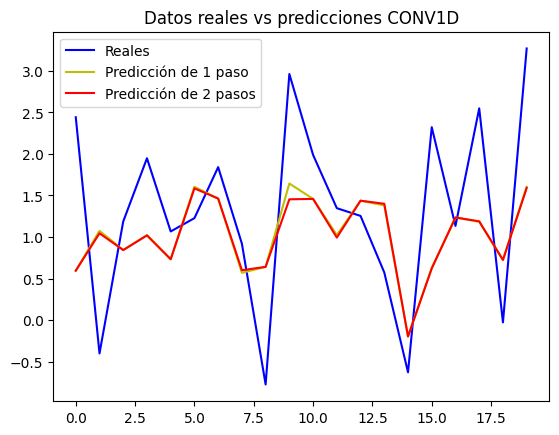

Error cuadrático medio de 1 paso del modelo CONV1D: 1.6667213
Error cuadrático medio de 2 pasos del modelo CONV1D: 0.6385998214717857


In [ ]:
plt.plot(ytest_conv1d[0:20], 'b', label='Reales')
plt.plot(Ypredict1_conv1d[0:20], 'y', label='Predicción de 1 paso')
plt.plot(Ypredict2_conv1d[0:20], 'r', label='Predicción de 2 pasos')
plt.title('Datos reales vs predicciones CONV1D')
plt.legend()
plt.show()
# Se calcula el MSE logrado con las predicciones
mse1_conv1d=np.mean(keras.losses.mean_squared_error(ytest_conv1d, Ypredict1_conv1d))
print('Error cuadrático medio de 1 paso del modelo CONV1D:', mse1_conv1d)
mse2_conv1d=np.mean(keras.losses.mean_squared_error(ytest_conv1d, Ypredict2_conv1d))
print('Error cuadrático medio de 2 pasos del modelo CONV1D:', mse2_conv1d)

# **Comparación de los modelos**

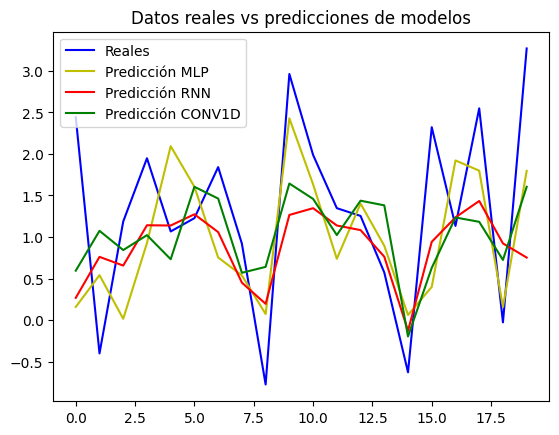

Error cuadrático medio de 1 paso del modelo MLP: 0.6344731
Error cuadrático medio de 1 paso del modelo RNN: 0.6279665
Error cuadrático medio de 1 paso del modelo CONV1D: 1.6667213


In [ ]:
plt.plot(ytest_conv1d[0:20], 'b', label='Reales')
plt.plot(Ypredic1_mlp[0:20], 'y', label='Predicción MLP')
plt.plot(Ypredic1_rnn[0:20], 'r', label='Predicción RNN')
plt.plot(Ypredict1_conv1d[0:20], 'g', label='Predicción CONV1D')
plt.title('Datos reales vs predicciones de modelos')
plt.legend()
plt.show()

print('Error cuadrático medio de 1 paso del modelo MLP:', mse1_mlp)
print('Error cuadrático medio de 1 paso del modelo RNN:', mse1_rnn)
print('Error cuadrático medio de 1 paso del modelo CONV1D:', mse1_conv1d)